In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('train_maybe_final.csv')

In [3]:
last_assessments = pd.read_csv('last_assessments.csv')  

In [4]:
last_assessments.head()


,Unnamed: 0,installation_id,game_session,timestamp,accuracy_group
0,2617,0006a69f,a9ef3ecb3d1acc6a,2019-08-06 20:50:35.426000+00:00,3.0
1,6022,0006c192,957406a905d59afd,2019-10-01 01:02:46.523000+00:00,2.0
2,6067,00129856,ae691ec5ad5652cf,2019-09-22 16:33:10.216000+00:00,3.0
3,7263,001d0ed0,8fdd5d389d0e272e,2019-09-05 14:29:16.342000+00:00,0.0
4,8523,00225f67,619b9c069cf790ca,2019-10-06 00:05:17.306000+00:00,0.0


In [5]:
last_assessments['accuracy_group1'] = last_assessments.accuracy_group.map({3:3,2:0,1:0,0:0})
last_assessments.head()

,Unnamed: 0,installation_id,game_session,timestamp,accuracy_group,accuracy_group1
0,2617,0006a69f,a9ef3ecb3d1acc6a,2019-08-06 20:50:35.426000+00:00,3.0,3
1,6022,0006c192,957406a905d59afd,2019-10-01 01:02:46.523000+00:00,2.0,0
2,6067,00129856,ae691ec5ad5652cf,2019-09-22 16:33:10.216000+00:00,3.0,3
3,7263,001d0ed0,8fdd5d389d0e272e,2019-09-05 14:29:16.342000+00:00,0.0,0
4,8523,00225f67,619b9c069cf790ca,2019-10-06 00:05:17.306000+00:00,0.0,0


In [6]:
last_assessments.accuracy_group.value_counts(normalize = True)

3.0    0.451320
0.0    0.283849
1.0    0.135964
2.0    0.128867
Name: accuracy_group, dtype: float64

In [7]:
last_assessments.accuracy_group1.value_counts(normalize = True)

0    0.54868
3    0.45132
Name: accuracy_group1, dtype: float64

In [8]:
df.shape

(5310606, 19)

In [9]:
df.installation_id.nunique()

3485

In [10]:
#create columns game_mins convert game_time to minutes.
df['game_mins'] = df.game_time/60_000

In [11]:
types = df.groupby(['installation_id', 'game_session', 'type']).count().reset_index()[['installation_id', 'game_session', 'type']]

In [12]:
accuracy_groups = df[df.type =='Assessment'].groupby(['installation_id','game_session','type','accuracy_group']).count().reset_index()

In [13]:
accuracy_groups.accuracy_group.value_counts(normalize = True)

3.0    0.525551
0.0    0.215757
1.0    0.133884
2.0    0.124807
Name: accuracy_group, dtype: float64

In [14]:
installation_accuracy = pd.crosstab(accuracy_groups.installation_id, accuracy_groups.accuracy_group)

In [15]:
installation_accuracy

accuracy_group,0.0,1.0,2.0,3.0
installation_id,,,,
0006a69f,1,0,1,2
0006c192,1,0,0,1
001d0ed0,1,0,1,2
002db7e3,2,1,2,3
003372b0,1,0,1,3
004c2091,1,0,0,2
00634433,0,0,0,2
00667b88,0,0,0,1
00691033,5,2,0,1


In [16]:
installation_type = pd.crosstab(types.installation_id, types.type)

In [17]:
installation_type

type,Activity,Assessment,Clip,Game
installation_id,,,,
0006a69f,10,4,28,13
0006c192,8,2,30,6
001d0ed0,1,4,19,3
00225f67,3,0,10,3
00279ac5,10,0,21,11
002db7e3,15,8,39,11
003372b0,8,5,27,11
004c2091,7,3,21,1
00634433,0,2,7,1


In [18]:
history = pd.concat([installation_accuracy, installation_type], axis=1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
labels = last_assessments.set_index('installation_id')[['accuracy_group','accuracy_group1']]

In [20]:
beta = pd.concat([history, labels], axis = 1)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [21]:
beta.reset_index(inplace = True)

In [22]:
beta.rename(columns = {'index': 'installation_id'}, inplace = True)

In [23]:
beta.head()

,installation_id,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,accuracy_group,accuracy_group1
0,0006a69f,1.0,0.0,1.0,2.0,10.0,4.0,28.0,13.0,3.0,3
1,0006c192,1.0,0.0,0.0,1.0,8.0,2.0,30.0,6.0,2.0,0
2,00129856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3
3,001d0ed0,1.0,0.0,1.0,2.0,1.0,4.0,19.0,3.0,0.0,0
4,00225f67,NaN,NaN,NaN,NaN,3.0,0.0,10.0,3.0,0.0,0


# max_ceiling

In [24]:
max_ceiling = df[df.type == "Assessment"].groupby(["installation_id","game_session"])[['accuracy_group']].max().reset_index().sort_values(by=["installation_id","accuracy_group"],ascending=False)

In [25]:
max_ceiling = max_ceiling.drop_duplicates(subset="installation_id",keep="first").drop(columns=['game_session']).rename(columns = {'accuracy_group': 'max_accuracy_group'}).reset_index().drop(columns = ['index'])

In [26]:
max_ceiling

,installation_id,max_accuracy_group
0,ffeb0b1b,1.0
1,ffc90c32,3.0
2,ff9715db,3.0
3,ff9305d7,1.0
4,ff90db99,3.0
5,ff882868,1.0
6,ff3e1e35,3.0
7,fe73bf4b,3.0
8,fe5f0699,3.0
9,fe4d880a,3.0


# Median accuracy

In [27]:
median_accuracy_group = df[df.type == "Assessment"].groupby(["installation_id","game_session"])[['accuracy_group']].median().reset_index().sort_values(by=["installation_id","accuracy_group"],ascending=False)


In [28]:
median_accuracy_group = median_accuracy_group.drop_duplicates(subset="installation_id",keep="first").drop(columns=['game_session']).rename(columns = {'accuracy_group': 'median_accuracy_group'}).reset_index().drop(columns = ['index'])

In [29]:
median_accuracy_group

,installation_id,median_accuracy_group
0,ffeb0b1b,1.0
1,ffc90c32,3.0
2,ff9715db,3.0
3,ff9305d7,1.0
4,ff90db99,3.0
5,ff882868,1.0
6,ff3e1e35,3.0
7,fe73bf4b,3.0
8,fe5f0699,3.0
9,fe4d880a,3.0


# Low accuracy_group


In [30]:
low_accuracy_group = df[df.type == "Assessment"].groupby(["installation_id","game_session"])[['accuracy_group']].min().reset_index().sort_values(by=["installation_id","accuracy_group"],ascending=False)

In [31]:
low_accuracy_group = low_accuracy_group.drop_duplicates(subset="installation_id",keep="first").drop(columns=['game_session']).rename(columns = {'accuracy_group': 'low_accuracy_group'}).reset_index().drop(columns = ['index'])
low_accuracy_group

,installation_id,low_accuracy_group
0,ffeb0b1b,1.0
1,ffc90c32,3.0
2,ff9715db,3.0
3,ff9305d7,1.0
4,ff90db99,3.0
5,ff882868,1.0
6,ff3e1e35,3.0
7,fe73bf4b,3.0
8,fe5f0699,3.0
9,fe4d880a,3.0


# Average Number of Actions

In [32]:
average_no_actions = df.groupby(['installation_id','game_session'])[['event_id']].count().reset_index().groupby(['installation_id'])[['event_id']].mean().rename(columns = {'event_id': 'avg_no_actions'}).reset_index()

In [33]:
average_no_actions = average_no_actions.sort_values(by=['installation_id'], ascending=False)
average_no_actions

,installation_id,avg_no_actions
3484,ffeb0b1b,42.555556
3483,ffd2871d,111.000000
3482,ffc90c32,40.061224
3481,ff9715db,46.512195
3480,ff9305d7,73.884615
3479,ff90db99,44.586957
3478,ff882868,51.500000
3477,ff3e1e35,41.979381
3476,ff24ea49,11.666667
3475,ff107709,1.000000


# Number of visits to each world

In [34]:
worlds = df.groupby(['installation_id','game_session','world']).count()[['event_id']].reset_index()

In [35]:
world_visits = pd.crosstab(worlds.installation_id, worlds.world)
world_visits

world,CRYSTALCAVES,MAGMAPEAK,NONE,TREETOPCITY
installation_id,,,,
0006a69f,0,13,3,39
0006c192,12,14,4,16
001d0ed0,14,0,1,12
00225f67,0,0,1,15
00279ac5,12,9,4,17
002db7e3,15,22,4,32
003372b0,20,9,1,21
004c2091,18,9,0,5
00634433,6,3,1,0


# Number of assessments in each world:


In [36]:
assessment_worlds = df[df.type == 'Assessment'].groupby(['installation_id', 'game_session','world']).count()[['event_id']].reset_index()

In [37]:
assessment_worlds = pd.crosstab(assessment_worlds.installation_id, assessment_worlds.world).rename(columns = {'CRYSTALCAVES': 'assesments_CC', 'MAGMAPEAK': 'assessments_MP', 'TREETOPCITY': 'Assessments_TTC'})

# Number of minutes in each type

In [38]:
df.columns

Index(['Unnamed: 0', 'event_id', 'game_session', 'timestamp', 'event_data',
       'installation_id', 'event_count', 'event_code', 'game_time', 'title',
       'type', 'world', 'num_correct', 'num_incorrect', 'accuracy',
       'accuracy_group', 'date', 'hour', 'weekday', 'game_mins'],
      dtype='object')

In [39]:
game_time_group = df.groupby(['installation_id', 'game_session', 'type','date','weekday'])[['game_mins']].max().reset_index()

In [40]:
agg = game_time_group.groupby(['installation_id', 'type'])[['game_mins']].sum()

In [41]:
agg = agg.reset_index()

In [42]:
game_mins = agg.pivot(index = 'installation_id', columns = 'type', values = 'game_mins')

In [43]:
game_mins.fillna(0, inplace= True)

In [44]:
game_mins = game_mins.reset_index()

In [45]:
game_mins.head()

type,installation_id,Activity,Assessment,Clip,Game
0,0006a69f,40.428983,3.187867,0.0,21.988250
1,0006c192,20.175500,1.771617,0.0,8.834550
2,001d0ed0,0.477983,2.609250,0.0,4.459850
3,00225f67,3.612000,0.000000,0.0,5.462883
4,00279ac5,25.135867,0.000000,0.0,50.541133


In [46]:
game_mins.columns

Index(['installation_id', 'Activity', 'Assessment', 'Clip', 'Game'], dtype='object', name='type')

In [47]:
game_mins.columns = ['installation_id', 'activity_mins', 'assessment_mins','clip_mins', 'game_mins']

In [48]:
game_mins.head()

,installation_id,activity_mins,assessment_mins,clip_mins,game_mins
0,0006a69f,40.428983,3.187867,0.0,21.988250
1,0006c192,20.175500,1.771617,0.0,8.834550
2,001d0ed0,0.477983,2.609250,0.0,4.459850
3,00225f67,3.612000,0.000000,0.0,5.462883
4,00279ac5,25.135867,0.000000,0.0,50.541133


In [49]:

assess = df[df.type == 'Assessment']

In [50]:
groups = assess.groupby(['title', 'accuracy_group'])[['installation_id']].count().reset_index()

In [51]:
groups.columns = ['title', 'accuracy_group', 'users']
groups.head()

,title,accuracy_group,users
0,Bird Measurer (Assessment),0.0,32002
1,Bird Measurer (Assessment),1.0,43559
2,Bird Measurer (Assessment),2.0,13192
3,Bird Measurer (Assessment),3.0,20067
4,Cart Balancer (Assessment),0.0,17796


In [52]:
# make median dataframe
med = assess.groupby(['installation_id', 'title'])[['accuracy']].median()

In [53]:
med.reset_index(inplace = True)

In [54]:
med_title = med.pivot(index = 'installation_id', columns = 'title', values = 'accuracy')

In [55]:
med_title.fillna(value = 0, inplace = True)

In [56]:
med_title.reset_index(inplace = True)

In [57]:
med_title.columns = ['installation_id', 'bird_med', 'cart_med', 'cauld_med', 'chest_med', 'shroom_med']

In [58]:
med_title.head()

,installation_id,bird_med,cart_med,cauld_med,chest_med,shroom_med
0,0006a69f,0.000000,0.0,0.0,0.0,1.0
1,0006c192,0.000000,0.0,1.0,0.0,0.0
2,001d0ed0,0.000000,1.0,0.0,0.0,0.5
3,002db7e3,0.090909,1.0,1.0,0.0,0.5
4,003372b0,0.500000,1.0,0.0,0.0,1.0


In [59]:
# create mean dataframe
mean_ = assess.groupby(['installation_id', 'title'])[['accuracy']].mean()
mean_.head()

accuracy
installation_id title                                 
0006a69f        Bird Measurer (Assessment)       0.000
                Mushroom Sorter (Assessment)     0.832
0006c192        Cauldron Filler (Assessment)     1.000
                Mushroom Sorter (Assessment)     0.000
001d0ed0        Bird Measurer (Assessment)       0.000

In [60]:
mean_.reset_index(inplace = True)
mean_.head()

,installation_id,title,accuracy
0,0006a69f,Bird Measurer (Assessment),0.000
1,0006a69f,Mushroom Sorter (Assessment),0.832
2,0006c192,Cauldron Filler (Assessment),1.000
3,0006c192,Mushroom Sorter (Assessment),0.000
4,001d0ed0,Bird Measurer (Assessment),0.000


In [61]:
mean_title = mean_.pivot(index = 'installation_id', columns = 'title', values = 'accuracy')
mean_title.head()

title,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
installation_id,,,,,
0006a69f,0.000000,NaN,NaN,NaN,0.832000
0006c192,NaN,NaN,1.0,NaN,0.000000
001d0ed0,0.000000,1.0,NaN,NaN,0.683168
002db7e3,0.227273,1.0,1.0,0.0,0.723529
003372b0,0.500000,1.0,NaN,0.0,1.000000


In [62]:
mean_title.fillna(0, inplace = True)
mean_title.head()

title,Bird Measurer (Assessment),Cart Balancer (Assessment),Cauldron Filler (Assessment),Chest Sorter (Assessment),Mushroom Sorter (Assessment)
installation_id,,,,,
0006a69f,0.000000,0.0,0.0,0.0,0.832000
0006c192,0.000000,0.0,1.0,0.0,0.000000
001d0ed0,0.000000,1.0,0.0,0.0,0.683168
002db7e3,0.227273,1.0,1.0,0.0,0.723529
003372b0,0.500000,1.0,0.0,0.0,1.000000


In [63]:
mean_title.reset_index(inplace = True)
# mean_title.head()

In [64]:
mean_title.columns = ['installation_id', 'bird_mean', 'cart_mean', 'cauld_mean', 'chest_mean','shroom_mean']

In [65]:
mean_title.head()

,installation_id,bird_mean,cart_mean,cauld_mean,chest_mean,shroom_mean
0,0006a69f,0.000000,0.0,0.0,0.0,0.832000
1,0006c192,0.000000,0.0,1.0,0.0,0.000000
2,001d0ed0,0.000000,1.0,0.0,0.0,0.683168
3,002db7e3,0.227273,1.0,1.0,0.0,0.723529
4,003372b0,0.500000,1.0,0.0,0.0,1.000000


In [66]:
# Create min df
min_ = assess.groupby(['installation_id', 'title'])[['accuracy']].min()

In [67]:
min_.reset_index(inplace = True)

In [68]:
min_title = min_.pivot(index = 'installation_id', columns = 'title', values = 'accuracy')

In [69]:
min_title.fillna(0, inplace = True)

In [70]:
min_title.reset_index(inplace = True)

In [71]:

min_title.columns = ['installation_id', 'bird_min', 'cart_min', 'cauld_min', 'chest_min', 'shroom_min']

In [72]:
# create max dataframe
max_ = assess.groupby(['installation_id', 'title'])[['accuracy']].max()

In [73]:
max_.reset_index(inplace = True)

In [74]:
max_title = max_.pivot(index = 'installation_id', columns = 'title', values = 'accuracy')

In [75]:
max_title.fillna(0, inplace = True)

In [76]:
max_title.reset_index(inplace = True)

In [77]:
max_title.columns = ['installation_id', 'bird_max', 'cart_max', 'cauld_max', 'chest_max', 'shroom_max']

# ACCURACY TENDENCY


In [78]:
import numpy as np

In [79]:
assessment = df[df.type == 'Assessment']

In [80]:
tendency = assessment.groupby(['installation_id','game_session',"accuracy"])[['accuracy']].count().rename(columns={"accuracy":"acc"}).sort_values(by=["installation_id","acc"],ascending=False).reset_index()

tendency = tendency.drop_duplicates(subset="installation_id",keep="first")
tendency = tendency[["installation_id","accuracy"]]

In [81]:
condition_list = [tendency.accuracy == 0, tendency.accuracy == 0.5,tendency.accuracy == 1, (~tendency.accuracy.isin([0,1,0.5]))]
choice_list = ["low_scorer","avg_scorer","high_scorer","random_scorer"]

tendency["group"] = np.select(condition_list,choice_list,0)

In [82]:
tendency = pd.get_dummies(tendency,columns=["group"], prefix="tendency")
tendency = tendency[['installation_id','tendency_avg_scorer','tendency_high_scorer', 'tendency_low_scorer','tendency_random_scorer']].set_index("installation_id")

In [83]:
tendency.shape

(2496, 4)

In [84]:
tendency.reset_index(inplace = True)

In [85]:
tendency.head()

,installation_id,tendency_avg_scorer,tendency_high_scorer,tendency_low_scorer,tendency_random_scorer
0,ffeb0b1b,0,0,1,0
1,ffc90c32,0,0,0,1
2,ff9715db,0,0,1,0
3,ff9305d7,0,0,0,1
4,ff90db99,0,0,0,1


# Merge dataframes together

In [86]:
max_median_low = pd.concat([max_ceiling,median_accuracy_group[['median_accuracy_group']], low_accuracy_group[['low_accuracy_group']]], axis=1)
max_median_low_worlds = pd.merge(assessment_worlds, max_median_low, on = 'installation_id', how = 'left')
max_median_low_tendency = pd.merge(tendency, max_median_low_worlds, on = 'installation_id', how = 'left')

In [87]:
max_median_low_tendency.shape

(2496, 11)

In [88]:
max_median_low_worlds.shape

(2496, 7)

In [89]:
beta = pd.merge(beta, max_median_low_tendency, on='installation_id', how = 'left')

In [90]:

beta = pd.merge(beta, average_no_actions, on = 'installation_id', how = 'left')

In [91]:
beta = pd.merge(beta, world_visits, on ='installation_id', how = 'left')

In [92]:
beta = pd.merge(beta, game_mins, on = 'installation_id', how = 'left')

In [93]:
beta = pd.merge(beta, med_title, on = 'installation_id', how = 'left')

In [94]:
beta = pd.merge(beta, mean_title, on = 'installation_id', how = 'left')

In [95]:
beta = pd.merge(beta, min_title, on = 'installation_id', how = 'left')

In [96]:
beta = pd.merge(beta, max_title, on = 'installation_id', how = 'left')

In [97]:
beta.shape

(3523, 50)

In [98]:
beta.columns

Index([       'installation_id',                      0.0,
                            1.0,                      2.0,
                            3.0,               'Activity',
                   'Assessment',                   'Clip',
                         'Game',         'accuracy_group',
              'accuracy_group1',    'tendency_avg_scorer',
         'tendency_high_scorer',    'tendency_low_scorer',
       'tendency_random_scorer',          'assesments_CC',
               'assessments_MP',        'Assessments_TTC',
           'max_accuracy_group',  'median_accuracy_group',
           'low_accuracy_group',         'avg_no_actions',
                 'CRYSTALCAVES',              'MAGMAPEAK',
                         'NONE',            'TREETOPCITY',
                'activity_mins',        'assessment_mins',
                    'clip_mins',              'game_mins',
                     'bird_med',               'cart_med',
                    'cauld_med',              'chest_med

In [99]:
#drop_rows = beta[beta.max_accuracy_group.isna()].installation_id
#drop_rows

In [100]:
# beta1 = beta.drop(drop_rows.index)

In [101]:
beta1 = beta.fillna(0)
beta1

,installation_id,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,accuracy_group,...,bird_min,cart_min,cauld_min,chest_min,shroom_min,bird_max,cart_max,cauld_max,chest_max,shroom_max
0,0006a69f,1.0,0.0,1.0,2.0,10.0,4.0,28.0,13.0,3.0,...,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.0,0.000000,0.000000,1.000000
1,0006c192,1.0,0.0,0.0,1.0,8.0,2.0,30.0,6.0,2.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
2,00129856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
3,001d0ed0,1.0,0.0,1.0,2.0,1.0,4.0,19.0,3.0,0.0,...,0.000000,1.000000,0.000000,0.000000,0.500000,0.000000,1.0,0.000000,0.000000,1.000000
4,00225f67,0.0,0.0,0.0,0.0,3.0,0.0,10.0,3.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
5,00279ac5,0.0,0.0,0.0,0.0,10.0,0.0,21.0,11.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
6,002db7e3,2.0,1.0,2.0,3.0,15.0,8.0,39.0,11.0,1.0,...,0.090909,1.000000,1.000000,0.000000,0.500000,0.500000,1.0,1.000000,0.000000,1.000000
7,003372b0,1.0,0.0,1.0,3.0,8.0,5.0,27.0,11.0,3.0,...,0.500000,1.000000,0.000000,0.000000,1.000000,0.500000,1.0,0.000000,0.000000,1.000000
8,004c2091,1.0,0.0,0.0,2.0,7.0,3.0,21.0,1.0,0.0,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.000000
9,00634433,0.0,0.0,0.0,2.0,0.0,2.0,7.0,1.0,0.0,...,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.0,1.000000,0.000000,0.000000


In [102]:
beta1.columns

Index([       'installation_id',                      0.0,
                            1.0,                      2.0,
                            3.0,               'Activity',
                   'Assessment',                   'Clip',
                         'Game',         'accuracy_group',
              'accuracy_group1',    'tendency_avg_scorer',
         'tendency_high_scorer',    'tendency_low_scorer',
       'tendency_random_scorer',          'assesments_CC',
               'assessments_MP',        'Assessments_TTC',
           'max_accuracy_group',  'median_accuracy_group',
           'low_accuracy_group',         'avg_no_actions',
                 'CRYSTALCAVES',              'MAGMAPEAK',
                         'NONE',            'TREETOPCITY',
                'activity_mins',        'assessment_mins',
                    'clip_mins',              'game_mins',
                     'bird_med',               'cart_med',
                    'cauld_med',              'chest_med

In [103]:
beta1.head()

,installation_id,0.0,1.0,2.0,3.0,Activity,Assessment,Clip,Game,accuracy_group,...,bird_min,cart_min,cauld_min,chest_min,shroom_min,bird_max,cart_max,cauld_max,chest_max,shroom_max
0,0006a69f,1.0,0.0,1.0,2.0,10.0,4.0,28.0,13.0,3.0,...,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,1.0
1,0006c192,1.0,0.0,0.0,1.0,8.0,2.0,30.0,6.0,2.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,00129856,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,001d0ed0,1.0,0.0,1.0,2.0,1.0,4.0,19.0,3.0,0.0,...,0.0,1.0,0.0,0.0,0.5,0.0,1.0,0.0,0.0,1.0
4,00225f67,0.0,0.0,0.0,0.0,3.0,0.0,10.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [104]:
beta1.shape


(3523, 50)

In [105]:
beta1.accuracy_group.value_counts(normalize = True)

3.0    0.451320
0.0    0.283849
1.0    0.135964
2.0    0.128867
Name: accuracy_group, dtype: float64

In [106]:
beta1.accuracy_group1.value_counts(normalize = True,dropna = False)

0    0.54868
3    0.45132
Name: accuracy_group1, dtype: float64

In [ ]:
# make a dataframe that has an equal sampling of each accuracy_group.
# be_0 = beta1[beta1.accuracy_group == 0].sample(n=339,random_state=123)
# be_1 = beta1[beta1.accuracy_group == 1].sample(n=339,random_state=123)
# be_2 = beta1[beta1.accuracy_group == 2].sample(n=339,random_state=123)
# be_3 = beta1[beta1.accuracy_group == 3].sample(n=339,random_state=123)

In [ ]:
# beta2 = pd.concat([be_0,be_1,be_2,be_3])
# beta2.accuracy_group.value_counts()

In [ ]:
# beta2.shape

In [ ]:
# beta2.head()

# Scale features

In [ ]:
# X_list = list(beta1.columns)
# X_list

In [ ]:
# X_list.remove('accuracy_group')
# X_list.remove('installation_id')
# X_list.remove('accuracy_group1')
# X_list

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFE




In [ ]:
# scaler = StandardScaler()
# scaled_features = pd.DataFrame(scaler.fit_transform(beta1[X_list]),columns=X_list).set_index(beta1.installation_id)
# scaled_features

In [ ]:
# y = beta1[['accuracy_group']]
# y.shape

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(scaled_features,y, test_size=0.3, stratify=y["accuracy_group"],random_state=123)

In [ ]:
# y_train.accuracy_group.value_counts(normalize = True)

# Feature Engineering

In [ ]:
# 

In [ ]:
# print(f"Best alpha using built-in LassoCV: {lasso.alpha_}")
# print(f"Best score using built-in LassoCV: {lasso.score(X_train,y_train)}")

In [ ]:
# coef = pd.DataFrame(lasso.coef_, index = X_train.columns).rename(columns={0:"feature_weights"}).sort_values(by="feature_weights",ascending=False)

In [ ]:
# coef

In [ ]:
#import matplotlib as plt

In [ ]:
# coef.plot(kind="barh",figsize=(15,12))

In [ ]:
# weighted_coef = coef[coef.feature_weights != 0]
# weighted_coef.sort_values(by='feature_weights')

In [ ]:
# weighted_coef_list = list(weighted_coef.index)
# weighted_coef_list

In [ ]:
# X_train = X_train[weighted_coef_list]
# X_test = X_test[weighted_coef_list]

In [ ]:
# X_train.shape, X_test.shape

# Create the Model

In [108]:
X_list = list(beta1.columns)

In [109]:
X_list.remove('accuracy_group')
X_list.remove('accuracy_group1')
X_list.remove('installation_id')
# X_list.remove('median_accuracy_group')
# X_list.remove(2.0)
# X_list.remove('low_accuracy_group')

In [ ]:
# X_list

In [110]:
X = beta1[X_list]
y = beta1[['accuracy_group']]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y["accuracy_group"],random_state=123)

In [ ]:
# y_test['accuracy_group'].value_counts()

# Recursive Feature Engineering

In [112]:
from sklearn.feature_selection import RFE

In [ ]:
# model = rf
# model

In [113]:
z = len(X_train.columns)
z

47

In [ ]:
# import numpy as np

In [114]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
number_of_features_list=np.arange(1,48)
high_score=0

#Variable to store the optimum features
number_of_features=0           
score_list =[]

for n in range(len(number_of_features_list)):
    print(n)
    model = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)
    rfe = RFE(model,number_of_features_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        number_of_features = number_of_features_list[n]

print("Optimum number of features: %d" %number_of_features)
print("Score with %d features: %f" % (number_of_features, high_score))

In [115]:
cols = list(X_train.columns)
model = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)

#Initializing RFE model
rfe = RFE(model, 36)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  

#Fitting the data to model
model.fit(X_rfe,y_train)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index([                    0.0,                     3.0,
                    'Activity',            'Assessment',
                        'Clip',                  'Game',
         'tendency_low_scorer',         'assesments_CC',
              'assessments_MP',       'Assessments_TTC',
          'max_accuracy_group', 'median_accuracy_group',
          'low_accuracy_group',        'avg_no_actions',
                'CRYSTALCAVES',             'MAGMAPEAK',
                        'NONE',           'TREETOPCITY',
               'activity_mins',       'assessment_mins',
                   'game_mins',              'bird_med',
                    'cart_med',             'chest_med',
                  'shroom_med',             'bird_mean',
                   'cart_mean',            'cauld_mean',
                  'chest_mean',           'shroom_mean',
                    'bird_min',              'cart_min',
                   'chest_min',            'shroom_min',
                    'bird_max',

# Create a Model with the Selected Features

In [116]:
X_list = list(selected_features_rfe)

In [117]:
X = beta1[X_list]
y = beta1[['accuracy_group']]

In [118]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


In [119]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)

In [120]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=600,
                       verbose=0, warm_start=False)

In [121]:
pd.DataFrame([rf.feature_importances_],columns = X_train.columns).T.rename(columns = {0: 'feature_importance'}).sort_values(by='feature_importance', ascending=True)

,feature_importance
bird_min,0.010520
assessments_MP,0.011033
tendency_low_scorer,0.012298
max_accuracy_group,0.012546
assesments_CC,0.013903
cart_med,0.013969
low_accuracy_group,0.014068
median_accuracy_group,0.015484
Assessments_TTC,0.015663
cauld_mean,0.016217


In [122]:
y_pred = rf.predict(X_train)
y_pred

array([0., 3., 3., ..., 3., 3., 3.])

In [123]:
y_pred_test1 = rf.predict(X_test)

In [124]:
y_pred_test1

array([0., 3., 3., ..., 0., 3., 3.])

In [125]:
y_pred_train1 = rf.predict(X_train)

In [126]:
pd.Series(y_pred_test1).value_counts(normalize=True)

3.0    0.822138
0.0    0.176916
1.0    0.000946
dtype: float64

In [127]:
rf.score(X_train, y_train)

0.5470397404703974

In [128]:
rf.score(X_test, y_test)

0.5061494796594135

In [129]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

         0.0       0.55      0.35      0.43       291
         1.0       0.00      0.00      0.00       141
         2.0       0.00      0.00      0.00       144
         3.0       0.50      0.90      0.64       481

    accuracy                           0.51      1057
   macro avg       0.26      0.31      0.27      1057
weighted avg       0.38      0.51      0.41      1057



In [130]:
confusion_matrix(y_test,y_pred_test1)

array([[102,   1,   0, 188],
       [ 21,   0,   0, 120],
       [ 16,   0,   0, 128],
       [ 48,   0,   0, 433]])

In [131]:
confusion_matrix(y_train,y_pred_train1)

array([[ 292,    0,    0,  417],
       [  36,   15,    0,  287],
       [  37,    0,    2,  271],
       [  69,    0,    0, 1040]])

In [132]:
prediction0 = rf.predict(X)

In [133]:
len(prediction0)

3523

In [134]:
beta1['prediction0'] = prediction0

In [135]:
print(classification_report(beta1['accuracy_group'], beta1['prediction0']))

              precision    recall  f1-score   support

         0.0       0.63      0.39      0.49      1000
         1.0       0.94      0.03      0.06       479
         2.0       1.00      0.00      0.01       454
         3.0       0.51      0.93      0.66      1590

    accuracy                           0.53      3523
   macro avg       0.77      0.34      0.30      3523
weighted avg       0.67      0.53      0.44      3523



In [136]:
confusion_matrix(beta1['accuracy_group'], beta1['prediction0'])

array([[ 394,    1,    0,  605],
       [  57,   15,    0,  407],
       [  53,    0,    2,  399],
       [ 117,    0,    0, 1473]])

In [137]:
314+480+621+1197

2612

# Create a Layer Model, First using accuracy_group1 in the Random Forest.

Is the accuracy group going to be a three or not a three.

In [220]:
X_list = list(beta1.columns)

In [221]:
X_list.remove('accuracy_group')
X_list.remove('accuracy_group1')
X_list.remove('installation_id')
X_list.remove('prediction0')
X_list.remove('predictions1')
# X_list.remove('median_accuracy_group')
# X_list.remove(2.0)
# X_list.remove('low_accuracy_group')

In [216]:
# X_list

In [222]:
X = beta1[X_list]
y = beta1[['accuracy_group1']]

In [223]:
len(X_list)

47

In [224]:
X_list

[0.0,
 1.0,
 2.0,
 3.0,
 'Activity',
 'Assessment',
 'Clip',
 'Game',
 'tendency_avg_scorer',
 'tendency_high_scorer',
 'tendency_low_scorer',
 'tendency_random_scorer',
 'assesments_CC',
 'assessments_MP',
 'Assessments_TTC',
 'max_accuracy_group',
 'median_accuracy_group',
 'low_accuracy_group',
 'avg_no_actions',
 'CRYSTALCAVES',
 'MAGMAPEAK',
 'NONE',
 'TREETOPCITY',
 'activity_mins',
 'assessment_mins',
 'clip_mins',
 'game_mins',
 'bird_med',
 'cart_med',
 'cauld_med',
 'chest_med',
 'shroom_med',
 'bird_mean',
 'cart_mean',
 'cauld_mean',
 'chest_mean',
 'shroom_mean',
 'bird_min',
 'cart_min',
 'cauld_min',
 'chest_min',
 'shroom_min',
 'bird_max',
 'cart_max',
 'cauld_max',
 'chest_max',
 'shroom_max']

In [225]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


In [ ]:
# y_test['accuracy_group'].value_counts()

# Recursive Feature Engineering ROUND 1 (LAYERING)

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# model = rf
# model

In [ ]:
z = len(X_train.columns)
z

In [ ]:
# import numpy as np

In [226]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
number_of_features_list=np.arange(1,48)
high_score=0

#Variable to store the optimum features
number_of_features=0           
score_list =[]

for n in range(len(number_of_features_list)):
    print(n)
    model = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)
    rfe = RFE(model,number_of_features_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        number_of_features = number_of_features_list[n]

print("Optimum number of features: %d" %number_of_features)
print("Score with %d features: %f" % (number_of_features, high_score))

In [227]:
cols = list(X_train.columns)
model = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)

#Initializing RFE model
rfe = RFE(model, 45)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  

#Fitting the data to model
model.fit(X_rfe,y_train)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index([                     0.0,                      1.0,
                            2.0,                      3.0,
                     'Activity',             'Assessment',
                         'Clip',                   'Game',
         'tendency_high_scorer',    'tendency_low_scorer',
       'tendency_random_scorer',          'assesments_CC',
               'assessments_MP',        'Assessments_TTC',
           'max_accuracy_group',  'median_accuracy_group',
           'low_accuracy_group',         'avg_no_actions',
                 'CRYSTALCAVES',              'MAGMAPEAK',
                         'NONE',            'TREETOPCITY',
                'activity_mins',        'assessment_mins',
                    'game_mins',               'bird_med',
                     'cart_med',              'cauld_med',
                    'chest_med',             'shroom_med',
                    'bird_mean',              'cart_mean',
                   'cauld_mean',             'chest_mean

# Create a Model with the Selected Features - ROUND 1

In [228]:
X_list = list(selected_features_rfe)

In [229]:
X = beta1[X_list]
y = beta1[['accuracy_group1']]

In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


In [231]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)

In [232]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=600,
                       verbose=0, warm_start=False)

In [233]:
rf_features = pd.DataFrame([rf.feature_importances_],columns = X_train.columns).T.rename(columns = {0: 'feature_importance'}).sort_values(by='feature_importance', ascending=False)

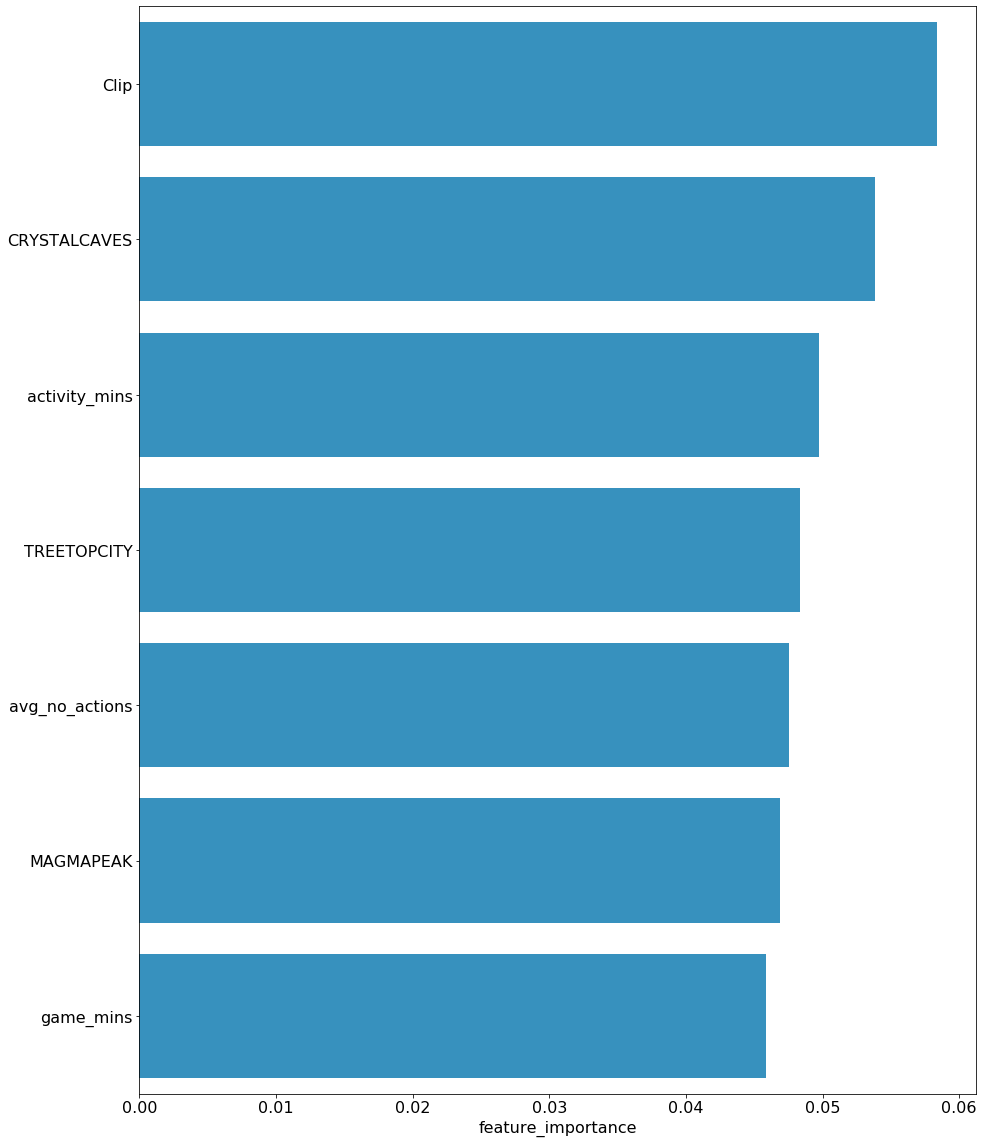

In [235]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', size=16)
plt.figure(figsize = (15,20))

sns.barplot(y=rf_features[0:7].index, x=rf_features[0:7].feature_importance, palette=["#2199D4","#2199D4","#2199D4","#2199D4","#2199D4","#2199D4","#2199D4","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray","gray", "gray","gray","gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray", "gray"])
# rf_features.plot(kind="barh",figsize=(15,20),colormap="red")

In [155]:
y_pred = rf.predict(X_train)
y_pred

array([0, 0, 0, ..., 3, 0, 0])

In [156]:
y_pred_test1 = rf.predict(X_test)

In [157]:
y_pred_test1

array([0, 0, 3, ..., 0, 3, 3])

In [158]:
y_pred_train1 = rf.predict(X_train)

In [159]:
pd.Series(y_pred_test1).value_counts(normalize=True)

0    0.74456
3    0.25544
dtype: float64

In [160]:
rf.score(X_train, y_train)

0.6861313868613139

In [161]:
rf.score(X_test, y_test)

0.618732261116367

In [162]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

           0       0.61      0.83      0.70       576
           3       0.64      0.36      0.46       481

    accuracy                           0.62      1057
   macro avg       0.63      0.60      0.58      1057
weighted avg       0.63      0.62      0.59      1057



In [163]:
confusion_matrix(y_test,y_pred_test1)

array([[480,  96],
       [307, 174]])

In [164]:
confusion_matrix(y_train,y_pred_train1)

array([[1209,  148],
       [ 626,  483]])

In [165]:
# Add predictions to the beta1 df.
beta1['predictions1'] = rf.predict(X)

In [ ]:
# y_test['predicted1'] = y_pred_test1
# y_test

In [ ]:
# y_train['predicted1'] = y_pred_train1
# y_train.head()

In [ ]:
# predictions1 = pd.concat([y_train[['predicted1']],y_test[['predicted1']]])
# predictions1.head()

In [ ]:
# predictions1.shape

In [ ]:
# predictions1.predicted1.value_counts(normalize = True)

# Run Through RF again!

In [ ]:
# beta2 = pd.concat([beta1, predictions1], axis =1)
# beta2.head()

In [ ]:
# beta2.columns

In [ ]:
# beta2.predicted1.value_counts()

In [ ]:
# beta3 = beta2[beta2.predicted1 == 4]
# beta3.shape

In [ ]:
# beta3.accuracy_group.value_counts(normalize = True)

In [ ]:
# beta3.columns

In [166]:
beta2 = beta1[beta1.predictions1 == 0]

In [167]:
beta2.shape

(2622, 52)

In [168]:
X_list = list(beta2.columns)

In [169]:
X_list.remove('accuracy_group')
X_list.remove('accuracy_group1')
# X_list.remove('accuracy_group1')
X_list.remove('installation_id')
X_list.remove('prediction0')
X_list.remove('predictions1')
# X_list.remove('median_accuracy_group')
# X_list.remove(2.0)
# X_list.remove('low_accuracy_group')

In [ ]:
X_list

In [170]:
X = beta2[X_list]
y = beta2[['accuracy_group']]

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


# Recursive Feature Engineering ROUND 2!

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
# model = rf
# model

In [172]:
z = len(X_train.columns)
z

47

In [ ]:
# import numpy as np

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
number_of_features_list=np.arange(1,48)
high_score=0

#Variable to store the optimum features
number_of_features=0           
score_list =[]

for n in range(len(number_of_features_list)):
    print(n)
    model = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)
    rfe = RFE(model,number_of_features_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        number_of_features = number_of_features_list[n]

print("Optimum number of features: %d" %number_of_features)
print("Score with %d features: %f" % (number_of_features, high_score))

In [173]:
cols = list(X_train.columns)
model = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)

#Initializing RFE model
rfe = RFE(model, 43)

#Transforming data using RFE
X_rfe = rfe.fit_transform(X_train,y_train)  

#Fitting the data to model
model.fit(X_rfe,y_train)
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index

print(selected_features_rfe)

Index([                    0.0,                     1.0,
                           2.0,                     3.0,
                    'Activity',            'Assessment',
                        'Clip',                  'Game',
         'tendency_low_scorer',         'assesments_CC',
              'assessments_MP',       'Assessments_TTC',
          'max_accuracy_group', 'median_accuracy_group',
          'low_accuracy_group',        'avg_no_actions',
                'CRYSTALCAVES',             'MAGMAPEAK',
                        'NONE',           'TREETOPCITY',
               'activity_mins',       'assessment_mins',
                   'game_mins',              'bird_med',
                    'cart_med',             'cauld_med',
                   'chest_med',            'shroom_med',
                   'bird_mean',             'cart_mean',
                  'cauld_mean',            'chest_mean',
                 'shroom_mean',              'bird_min',
                    'cart_min',

# Create a Model with the Selected Features

In [174]:
X_list = list(selected_features_rfe)

In [175]:
len(X_list)

43

In [176]:
X = beta2[X_list]
y = beta2[['accuracy_group']]

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 123)


In [178]:
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=3,
                            n_estimators=100,
                            max_depth=6, 
                            random_state=600)

In [179]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=600,
                       verbose=0, warm_start=False)

In [180]:
pd.DataFrame([rf.feature_importances_],columns = X_train.columns).T.rename(columns = {0: 'feature_importance'}).sort_values(by='feature_importance', ascending=False)

,feature_importance
Clip,0.063001
CRYSTALCAVES,0.061614
game_mins,0.060091
activity_mins,0.054441
assessment_mins,0.053945
avg_no_actions,0.050383
TREETOPCITY,0.046066
MAGMAPEAK,0.036442
Game,0.030237
Activity,0.028113


In [181]:
rf_features = pd.DataFrame([rf.feature_importances_],columns = X_train.columns).T.rename(columns = {0: 'feature_importance'}).sort_values(by='feature_importance', ascending=False)

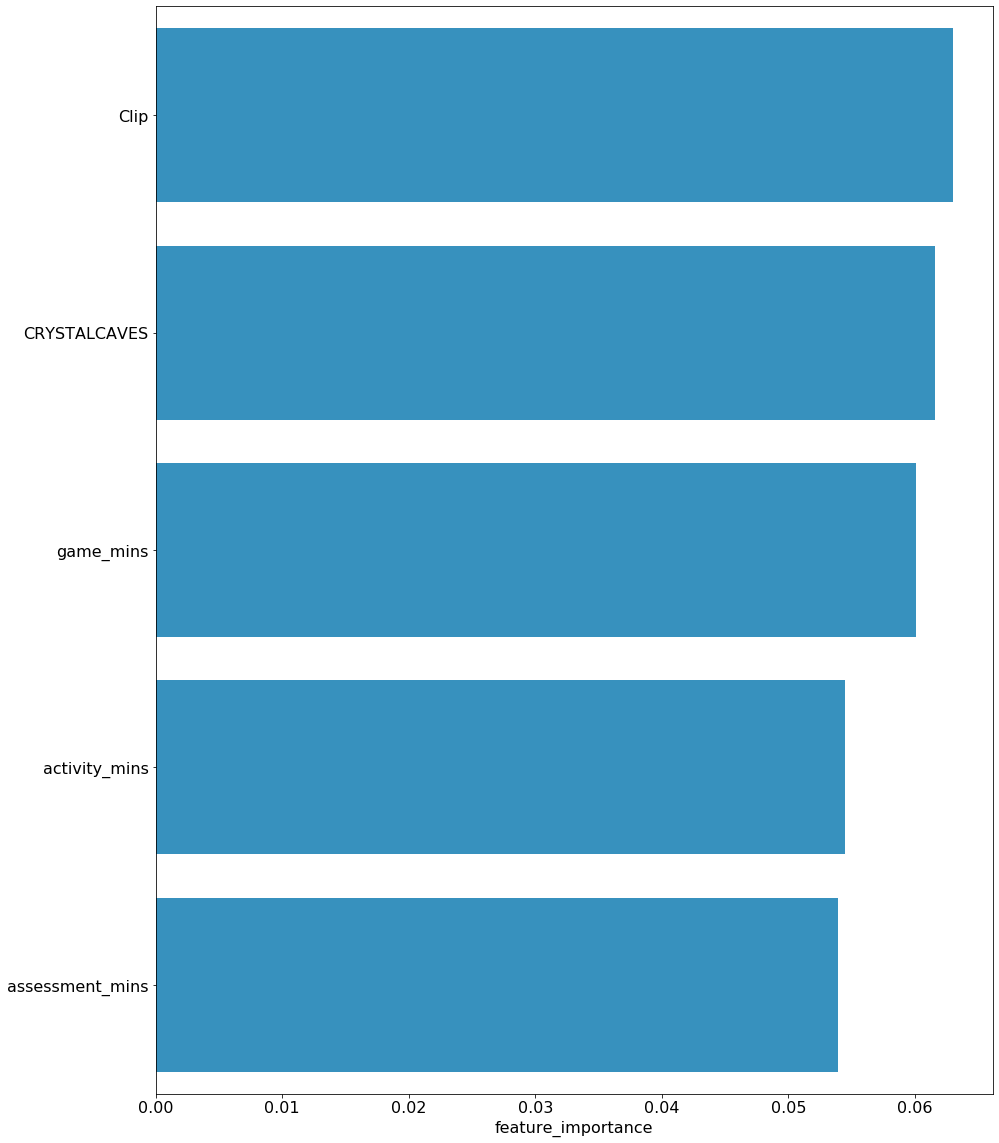

In [194]:
import seaborn as sns
plt.rc('font', size=16)
plt.figure(figsize = (15,20))

sns.barplot(y=rf_features[0:5].index, x=rf_features[0:5].feature_importance, color="#2199D4")
# rf_features.plot(kind="barh",figsize=(15,20),colormap="red")


In [ ]:
# rf_features.plot(kind="barh",figsize=(15,12))

In [195]:
y_pred_test1 = rf.predict(X_test)

In [196]:
y_pred_test1

array([3., 3., 0., 0., 0., 0., 3., 3., 3., 3., 3., 0., 3., 0., 3., 3., 3.,
       3., 3., 0., 3., 0., 3., 0., 3., 3., 3., 0., 3., 3., 3., 0., 3., 3.,
       3., 3., 0., 3., 3., 3., 0., 3., 0., 0., 0., 3., 3., 3., 3., 3., 3.,
       0., 3., 3., 0., 3., 0., 3., 3., 3., 0., 0., 0., 3., 3., 3., 3., 3.,
       3., 0., 0., 3., 3., 3., 3., 3., 3., 3., 3., 3., 0., 3., 3., 0., 3.,
       0., 0., 3., 3., 0., 3., 0., 2., 3., 0., 3., 3., 0., 3., 3., 3., 3.,
       3., 0., 0., 3., 0., 3., 3., 3., 3., 0., 3., 3., 3., 3., 3., 0., 3.,
       3., 0., 3., 3., 0., 3., 3., 0., 3., 3., 3., 3., 3., 3., 0., 3., 3.,
       0., 3., 0., 3., 0., 3., 0., 0., 3., 3., 0., 3., 3., 0., 3., 3., 0.,
       3., 3., 0., 3., 3., 3., 3., 0., 3., 3., 0., 3., 3., 3., 3., 3., 1.,
       0., 3., 3., 3., 0., 3., 3., 3., 0., 3., 3., 0., 3., 3., 3., 0., 3.,
       0., 3., 3., 3., 3., 3., 0., 3., 3., 3., 3., 3., 3., 3., 3., 0., 0.,
       0., 3., 3., 3., 3., 3., 1., 0., 3., 0., 3., 0., 3., 3., 3., 0., 3.,
       0., 0., 3., 3., 0.

In [197]:
y_pred_train1 = rf.predict(X_train)

In [198]:
pd.Series(y_pred_test1).value_counts(normalize=True)

3.0    0.612452
0.0    0.362135
2.0    0.015248
1.0    0.010165
dtype: float64

In [199]:
rf.score(X_train, y_train)

0.5596730245231608

In [200]:
rf.score(X_test, y_test)

0.42947903430749684

In [201]:
print(classification_report(y_test,y_pred_test1))

              precision    recall  f1-score   support

         0.0       0.49      0.48      0.49       293
         1.0       1.00      0.07      0.12       121
         2.0       0.25      0.03      0.05        98
         3.0       0.39      0.68      0.49       275

    accuracy                           0.43       787
   macro avg       0.53      0.31      0.29       787
weighted avg       0.50      0.43      0.38       787



In [202]:
confusion_matrix(y_test,y_pred_test1)

array([[141,   0,   5, 147],
       [ 32,   8,   3,  78],
       [ 24,   0,   3,  71],
       [ 88,   0,   1, 186]])

In [203]:
confusion_matrix(y_train,y_pred_train1)

array([[390,   1,   0, 242],
       [ 66,  47,   1, 168],
       [ 68,   1,  32, 161],
       [ 99,   1,   0, 558]])

In [204]:
X.shape

(2622, 43)

In [205]:
predictions_2 = pd.DataFrame({'installation_id': beta2.installation_id, 'predictions2':rf.predict(X)}).set_index(beta2.index)

In [206]:
prediction_df = pd.merge(beta1, predictions_2, on = 'installation_id', how = 'left')

In [207]:
prediction_df.shape

(3523, 53)

In [208]:
prediction_df.fillna(3, inplace = True )

In [209]:
prediction_df.columns

Index([       'installation_id',                      0.0,
                            1.0,                      2.0,
                            3.0,               'Activity',
                   'Assessment',                   'Clip',
                         'Game',         'accuracy_group',
              'accuracy_group1',    'tendency_avg_scorer',
         'tendency_high_scorer',    'tendency_low_scorer',
       'tendency_random_scorer',          'assesments_CC',
               'assessments_MP',        'Assessments_TTC',
           'max_accuracy_group',  'median_accuracy_group',
           'low_accuracy_group',         'avg_no_actions',
                 'CRYSTALCAVES',              'MAGMAPEAK',
                         'NONE',            'TREETOPCITY',
                'activity_mins',        'assessment_mins',
                    'clip_mins',              'game_mins',
                     'bird_med',               'cart_med',
                    'cauld_med',              'chest_med

In [210]:
confusion_matrix(prediction_df[['accuracy_group']],prediction_df[['predictions2']])

array([[ 531,    1,    5,  463],
       [  98,   55,    4,  322],
       [  92,    1,   35,  326],
       [ 187,    1,    1, 1401]])

In [211]:
confusion_matrix(prediction_df[['accuracy_group']],prediction_df[['prediction0']])

array([[ 394,    1,    0,  605],
       [  57,   15,    0,  407],
       [  53,    0,    2,  399],
       [ 117,    0,    0, 1473]])

In [212]:
print(classification_report(prediction_df[['accuracy_group']],prediction_df[['predictions2']]))

              precision    recall  f1-score   support

         0.0       0.58      0.53      0.56      1000
         1.0       0.95      0.11      0.20       479
         2.0       0.78      0.08      0.14       454
         3.0       0.56      0.88      0.68      1590

    accuracy                           0.57      3523
   macro avg       0.72      0.40      0.40      3523
weighted avg       0.65      0.57      0.51      3523



In [213]:
print(classification_report(prediction_df[['accuracy_group']], prediction_df[['prediction0']]))

              precision    recall  f1-score   support

         0.0       0.63      0.39      0.49      1000
         1.0       0.94      0.03      0.06       479
         2.0       1.00      0.00      0.01       454
         3.0       0.51      0.93      0.66      1590

    accuracy                           0.53      3523
   macro avg       0.77      0.34      0.30      3523
weighted avg       0.67      0.53      0.44      3523



In [ ]:
prediction_df['accuracy_group'].value_counts(normalize = True)

# Logistic Regression Model

In [ ]:
lm = LogisticRegression().fit(X_train, y_train)

In [ ]:
train = pd.DataFrame({'acutal': y_train.accuracy_group1})
test = pd.DataFrame({'actual': y_test.accuracy_group1})

In [ ]:
train['predicted'] = lm.predict(X_train)
test['predicted'] = lm.predict(X_test)

In [ ]:
accuracy_score(train.acutal, train.predicted)

In [ ]:
accuracy_score(test.actual, test.predicted)

# Decision Tree

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = .30, random_state = 123)


In [ ]:
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=123)


In [ ]:
clf.fit(X_train, y_train)


In [ ]:
clf.score(X_train, y_train)


In [ ]:
clf.score(X_test, y_test)


# Explore 1 and 2 accuracy_groups

In [ ]:
# df_1_2 = df[df.accuracy_group.isin([1,2])]

In [ ]:
# df_1_2.installation_id.nunique()

In [ ]:
# df_1_2.installation_id.nunique()/df.installation_id.nunique()

In [ ]:
# df_1_2.groupby(['installation_id', 'game_session','accuracy_group']).count()[['event_id']].reset_index().accuracy_group.value_counts(normalize = True)

In [ ]:
# Compare all accurracy_value counts.
# df.groupby(['installation_id', 'game_session', 'accuracy_group']).count()[['event_id']].reset_index().accuracy_group.value_counts(normalize = True)

In [ ]:
# df_1_2.groupby(['installation_id','game_session','type']).count()[['event_id']].reset_index().installation_id.nunique()

In [ ]:
# train = pd.read_csv('train.csv')

In [ ]:
# train_labels = pd.read_csv('train_labels.csv')

In [ ]:
# df = train[train.installation_id.isin(train_labels.installation_id)]

In [ ]:
# df = pd.merge(df, train_labels, on = 'installation_id', how = 'left')

In [ ]:
# df[df.accuracy_group]